In [ ]:
import numpy as np
import random
import gym
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


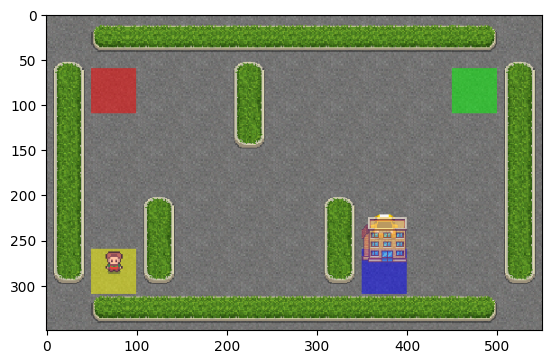

In [ ]:
environment = gym.make('Taxi-v3').env
environment.reset()
fig, ax = plt.subplots()
ax.imshow(environment.render(mode='rgb_array'))
plt.show()

In [ ]:
state = environment.observation_space.n
action=environment.action_space.n
print(state,action)

500 6


In [ ]:
alpha = 0.1 #learning rate- it is the value that controls how qucikly the agent learn knowledge
gamma = 0.6 #discount factor determinies the importance of future rewards in the agent's decision-making process
epsilon= 0.1 #The exploration rate control balance between (trying out new actions) and (choosing the best known )

In [ ]:
#unitial q table
q_table=np.zeros((state,action))
print(q_table)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [ ]:
num_of_epi = 100000
for epoch in range(0,num_of_epi):
  state = environment.reset()#reset env
  reward = 0
  terminated = False
  while not terminated:
    if random.uniform(0,1)<epsilon:
      action=environment.action_space.sample()
      print(f'action in if {action}' )
    else:
      action=np.argmax(q_table[state])
      print(f'action on if {action}')

      #take action
      next_state,reward,terminated,info = environment.step(action)
      print(f'nextState {next_state},reward{reward},terminated{terminated},info{info}')
      q_value=q_table[state,action]
      max_value = np.max(q_table[next_state])
      new_q_value = (1-alpha)*q_value+alpha*(reward+gamma*max_value)

      q_table[state,action]= new_q_value
      print(f'new q value table {q_table[state,action]}')
      state= next_state

action on if 0
nextState 482,reward-1,terminatedFalse,info{'prob': 1.0, 'action_mask': array([0, 1, 0, 1, 0, 0], dtype=int8)}
new q value table -0.1
action on if 1
nextState 382,reward-1,terminatedFalse,info{'prob': 1.0, 'action_mask': array([1, 1, 0, 1, 0, 0], dtype=int8)}
new q value table -0.1
action on if 0
nextState 482,reward-1,terminatedFalse,info{'prob': 1.0, 'action_mask': array([0, 1, 0, 1, 0, 0], dtype=int8)}
new q value table -0.1
action on if 2
nextState 482,reward-1,terminatedFalse,info{'prob': 1.0, 'action_mask': array([0, 1, 0, 1, 0, 0], dtype=int8)}
new q value table -0.1
action in if 0
action on if 3
nextState 462,reward-1,terminatedFalse,info{'prob': 1.0, 'action_mask': array([0, 1, 1, 0, 0, 0], dtype=int8)}
new q value table -0.1
action on if 0
nextState 462,reward-1,terminatedFalse,info{'prob': 1.0, 'action_mask': array([0, 1, 1, 0, 0, 0], dtype=int8)}
new q value table -0.1
action on if 1
nextState 362,reward-1,terminatedFalse,info{'prob': 1.0, 'action_mask': arra

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Streaming output truncated to the last 5000 lines.
action on if 0
nextState 101,reward-1,terminatedFalse,info{'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)}
new q value table -2.2219852342517936
action on if 3
nextState 101,reward-1,terminatedFalse,info{'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)}
new q value table -2.265754355237889
action on if 0
nextState 201,reward-1,terminatedFalse,info{'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)}
new q value table -2.2728283051472453
action on if 0
nextState 301,reward-1,terminatedFalse,info{'prob': 1.0, 'action_mask': array([1, 1, 0, 0, 0, 0], dtype=int8)}
new q value table -2.300877930080633
action on if 2
nextState 301,reward-1,terminatedFalse,info{'prob': 1.0, 'action_mask': array([1, 1, 0, 0, 0, 0], dtype=int8)}
new q value table -2.3010442674263194
action on if 3
nextState 301,reward-1,terminatedFalse,info{'prob': 1.0, 'action_mask': array([1, 1, 0, 0, 0, 0], dtype=int8)}
new q

KeyboardInterrupt: 

In [ ]:
print(q_table)

[[ 0.          0.          0.          0.          0.          0.        ]
 [-2.22198523 -2.22420487 -2.22528071 -2.22420487 -2.22546497 -2.8816    ]
 [-1.64030581 -1.63504788 -1.61408572 -1.63504788 -1.45483103 -1.96      ]
 ...
 [-1.14478405 -1.09779855 -1.14478405 -1.16422644 -1.96       -1.96      ]
 [-1.99123398 -1.99602419 -1.99123398 -2.0086911  -2.8816     -2.8816    ]
 [-0.196      -0.196      -0.196      -0.07       -1.         -1.        ]]


In [ ]:
total_penalties = 0
num_of_episodes = 100
for _ in range(num_of_episodes):
  state=environment.reset()
  penalties = 0
  reward = 0

  terminated = False

  while not terminated:
    action = np.argmax(q_table[state])
    state,reward,terminated,info=environment.step(action)
    if reward <= -10:
      penalties += 1
  total_penalties += penalties

NameError: name 'environment' is not defined